In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

In [ ]:
df = pd.read_csv("Annotated_data.csv")

In [ ]:
df.head()

,Id_Number,Patient Question,Distorted part,Dominant Distortion,Secondary Distortion (Optional)
0,4500,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,Personalization,NaN
1,4501,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,Labeling,Emotional Reasoning
2,4502,So I’ve been dating on and off this guy for a...,NaN,No Distortion,NaN
3,4503,My parents got divorced in 2004. My mother has...,NaN,No Distortion,NaN
4,4504,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,Fortune-telling,Emotional Reasoning


In [ ]:
df.isnull().sum()

Id_Number                             0
Patient Question                      0
Distorted part                      933
Dominant Distortion                   0
Secondary Distortion (Optional)    2114
dtype: int64

<Axes: >

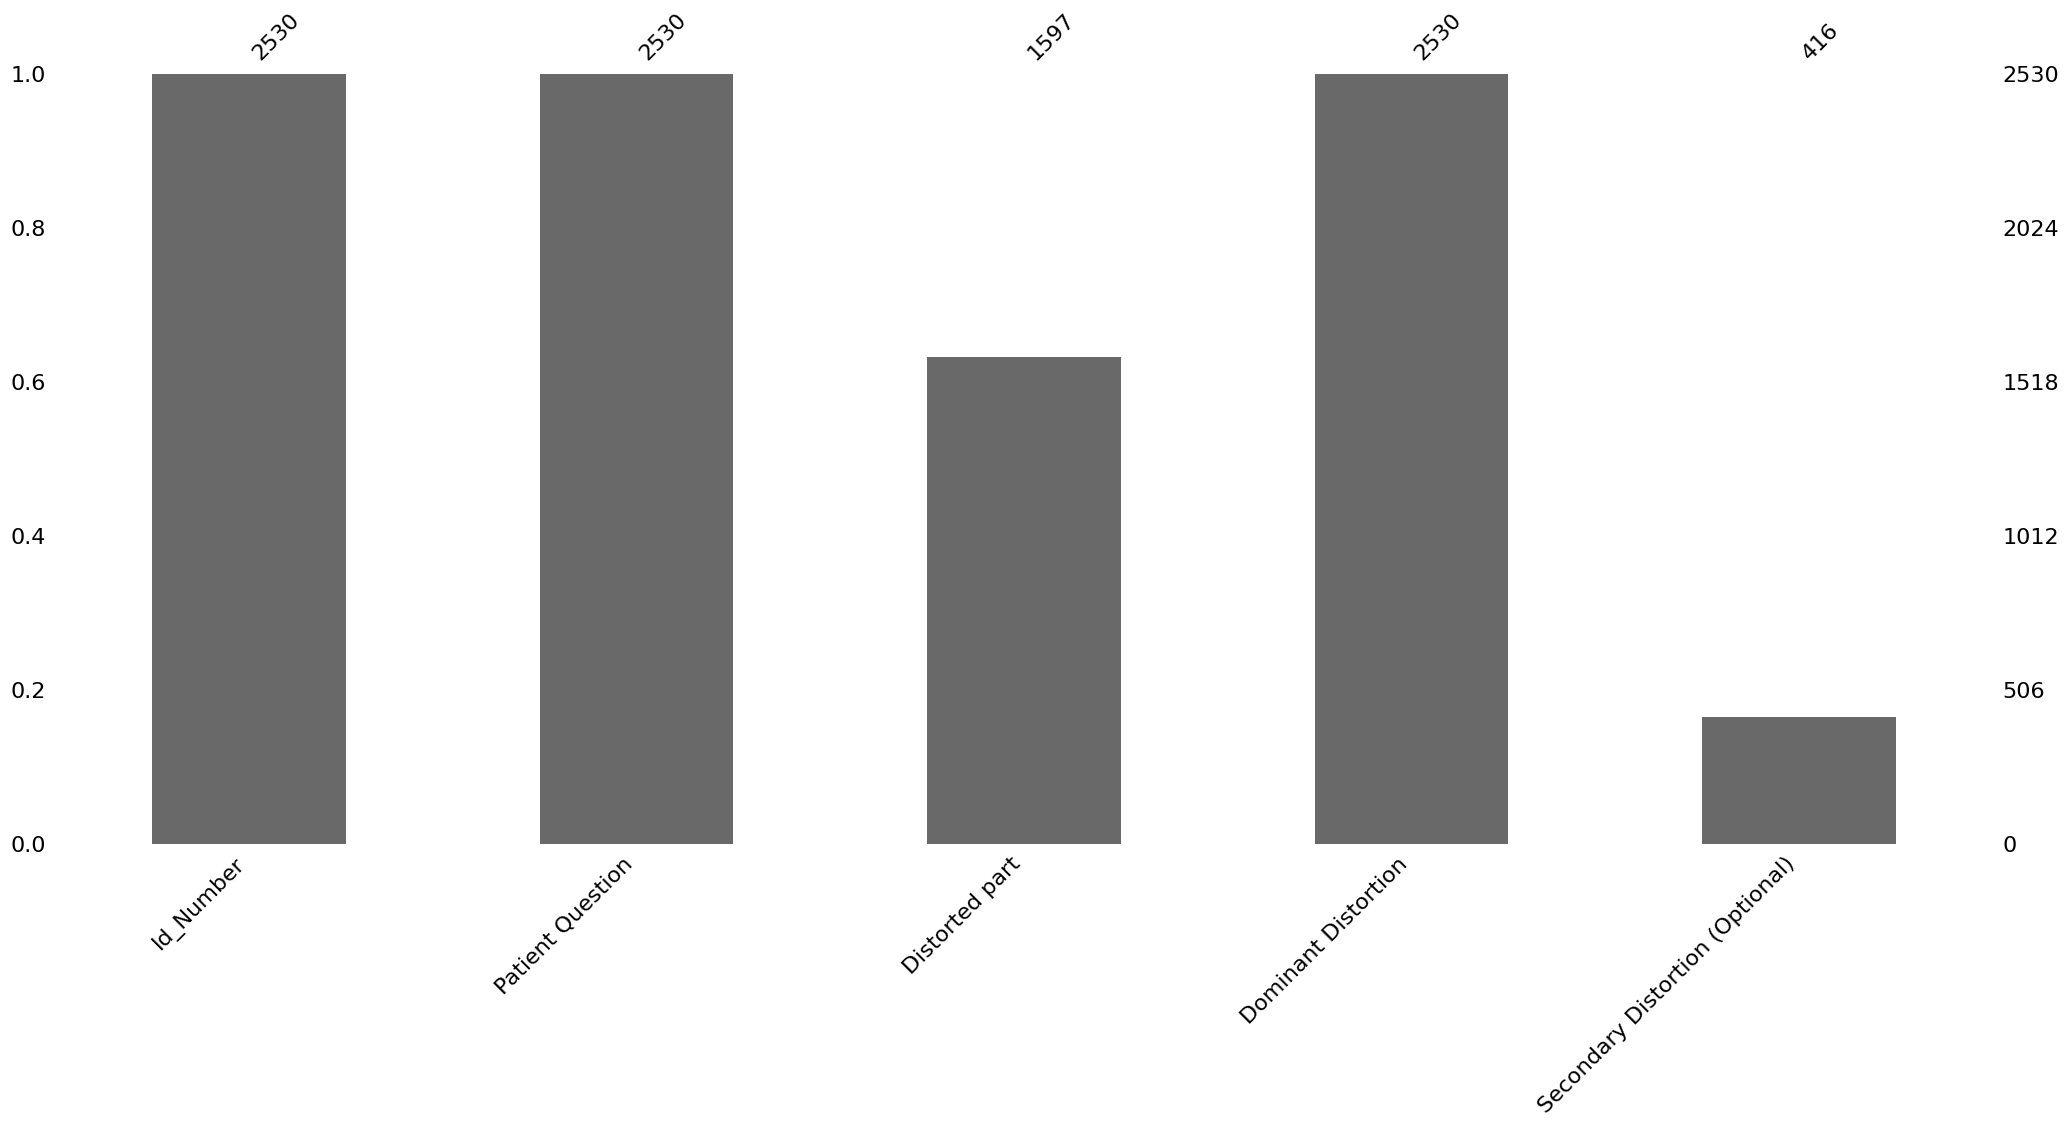

In [ ]:
msn.bar(df)

In [ ]:
df.shape

(2530, 5)

In [ ]:
df.drop("Secondary Distortion (Optional)",axis=1,inplace = True)

In [ ]:
df.head()

,Id_Number,Patient Question,Distorted part,Dominant Distortion
0,4500,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,Personalization
1,4501,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,Labeling
2,4502,So I’ve been dating on and off this guy for a...,NaN,No Distortion
3,4503,My parents got divorced in 2004. My mother has...,NaN,No Distortion
4,4504,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,Fortune-telling


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df['Dominant Distortion'].unique()

array(['Personalization', 'Labeling', 'No Distortion', 'Fortune-telling',
       'Magnification', 'Mind Reading', 'All-or-nothing thinking',
       'Overgeneralization', 'Mental filter', 'Emotional Reasoning',
       'Should statements'], dtype=object)

In [ ]:
df['Dominant Distortion'].unique().shape

(11,)

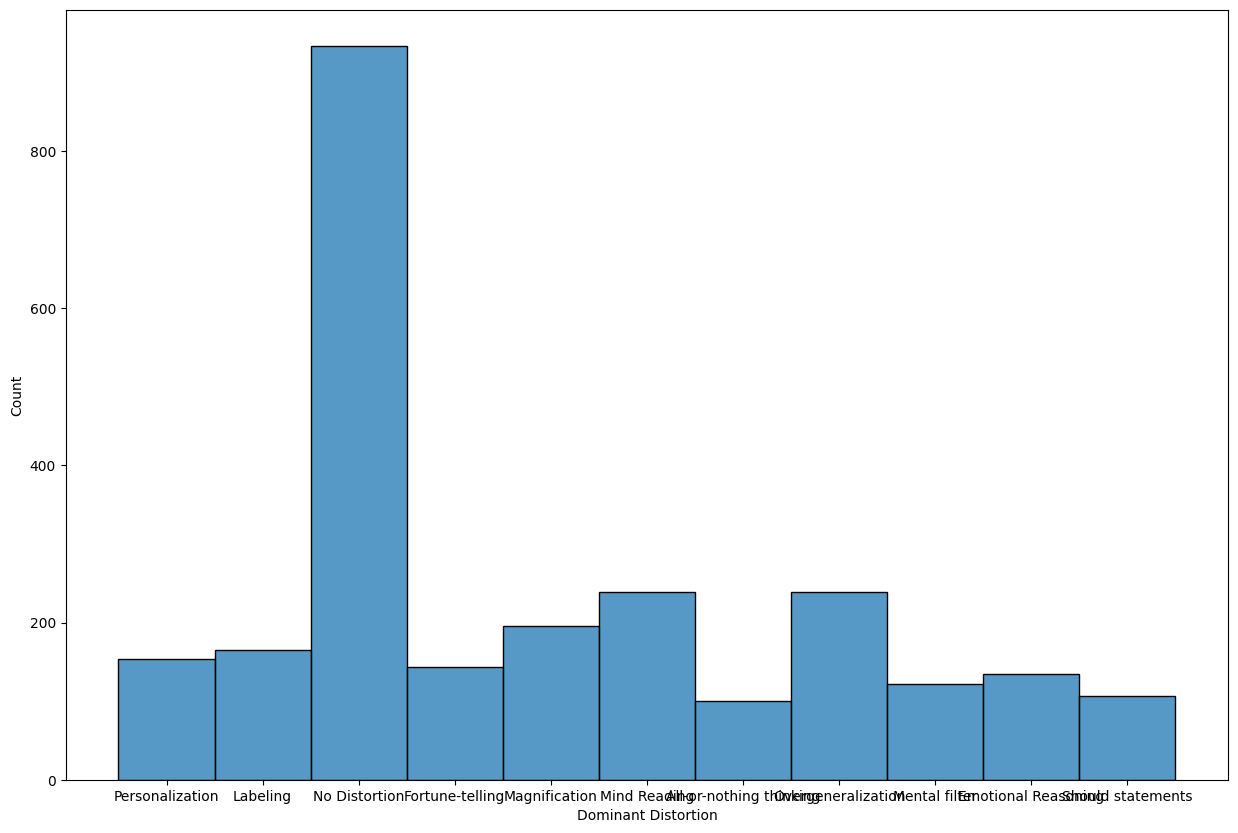

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(df['Dominant Distortion'])
plt.show()

In [ ]:
le = LabelEncoder()
df['Dominant Distortion'] = le.fit_transform(df['Dominant Distortion'])

In [ ]:
df['Dominant Distortion']

0       9
1       3
2       7
3       7
4       2
       ..
2525    7
2526    8
2527    5
2528    7
2529    7
Name: Dominant Distortion, Length: 2530, dtype: int64

In [ ]:
df['Dominant Distortion'].value_counts()

7     933
6     239
8     239
4     195
3     165
9     153
2     143
1     134
5     122
10    107
0     100
Name: Dominant Distortion, dtype: int64

In [ ]:
df.isnull().sum()

Id_Number                0
Patient Question         0
Distorted part         933
Dominant Distortion      0
dtype: int64

In [ ]:
df.fillna(value='0',inplace = True)

In [ ]:
df.isnull().sum()

Id_Number              0
Patient Question       0
Distorted part         0
Dominant Distortion    0
dtype: int64

In [ ]:
df['Dominant Distortion'].value_counts().sum()//11

230

In [ ]:
df2 = df

In [ ]:
df2.head()

,Id_Number,Patient Question,Distorted part,Dominant Distortion
0,4500,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,9
1,4501,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,3
2,4502,So I’ve been dating on and off this guy for a...,0,7
3,4503,My parents got divorced in 2004. My mother has...,0,7
4,4504,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,2


In [ ]:
df['Distorted part']

0       The voice are always fimilar (someone she know...
1       I feel trapped inside my disgusting self and l...
2                                                       0
3                                                       0
4       I refused to go because I didn’t know if it wa...
                              ...                        
2525                                                    0
2526    Now I am at university my peers around me all ...
2527    He claims he’s severely depressed and has outb...
2528                                                    0
2529                                                    0
Name: Distorted part, Length: 2530, dtype: object

In [ ]:
import nltk
import re
nltk. download('stopwords')
from nltk. corpus import stopwords
stopword=set(stopwords.words('english'))
stemmer = nltk. SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['Patient Question'] = df['Patient Question'].str.lower()

In [ ]:
df['Distorted part'] = df['Distorted part'].str.lower()

In [ ]:
df.head()

,Id_Number,Patient Question,Distorted part,Dominant Distortion
0,4500,"hello, i have a beautiful,smart,outgoing and a...",the voice are always fimilar (someone she know...,9
1,4501,since i was about 16 years old i’ve had these ...,i feel trapped inside my disgusting self and l...,3
2,4502,so i’ve been dating on and off this guy for a...,0,7
3,4503,my parents got divorced in 2004. my mother has...,0,7
4,4504,i don’t really know how to explain the situati...,i refused to go because i didn’t know if it wa...,2


In [ ]:
import string
punctuations_list = string.punctuation

In [ ]:
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

In [ ]:
df['Patient Question']= df['Patient Question'].apply(lambda x: remove_punctuations(x))
df.head()

,Id_Number,Patient Question,Distorted part,Dominant Distortion
0,4500,hello i have a beautifulsmartoutgoing and amaz...,the voice are always fimilar (someone she know...,9
1,4501,since i was about 16 years old i’ve had these ...,i feel trapped inside my disgusting self and l...,3
2,4502,so i’ve been dating on and off this guy for a...,0,7
3,4503,my parents got divorced in 2004 my mother has ...,0,7
4,4504,i don’t really know how to explain the situati...,i refused to go because i didn’t know if it wa...,2


In [ ]:
df['Distorted part']= df['Distorted part'].apply(lambda x: remove_punctuations(x))
df.head()

,Id_Number,Patient Question,Distorted part,Dominant Distortion
0,4500,hello i have a beautifulsmartoutgoing and amaz...,the voice are always fimilar someone she knows...,9
1,4501,since i was about 16 years old i’ve had these ...,i feel trapped inside my disgusting self and l...,3
2,4502,so i’ve been dating on and off this guy for a...,0,7
3,4503,my parents got divorced in 2004 my mother has ...,0,7
4,4504,i don’t really know how to explain the situati...,i refused to go because i didn’t know if it wa...,2


In [ ]:
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')

    important_words = []

    for word in str(text).split():

        if word not in stop_words:

            lemmatizer = WordNetLemmatizer()
            lemmatizer.lemmatize(word)

            important_words.append(word)

    output = " ".join(important_words)

    return output


In [ ]:
df['Patient Question'] = df['Patient Question'].apply(lambda text: remove_stopwords(text))
df.head()

,Id_Number,Patient Question,Distorted part,Dominant Distortion
0,4500,hello beautifulsmartoutgoing amazing five year...,the voice are always fimilar someone she knows...,9
1,4501,since 16 years old i’ve “spells” it’s impossib...,i feel trapped inside my disgusting self and l...,3
2,4502,i’ve dating guy almost 3 years 3 years younger...,0,7
3,4503,parents got divorced 2004 mother never recover...,0,7
4,4504,don’t really know explain situation deal lot f...,i refused to go because i didn’t know if it wa...,2


In [ ]:
df['Distorted part'] = df['Distorted part'].apply(lambda text: remove_stopwords(text))
df.head()

,Id_Number,Patient Question,Distorted part,Dominant Distortion
0,4500,hello beautifulsmartoutgoing amazing five year...,voice always fimilar someone knows im concerne...,9
1,4501,since 16 years old i’ve “spells” it’s impossib...,feel trapped inside disgusting self like i’m w...,3
2,4502,i’ve dating guy almost 3 years 3 years younger...,0,7
3,4503,parents got divorced 2004 mother never recover...,0,7
4,4504,don’t really know explain situation deal lot f...,refused go didn’t know going go record could p...,2


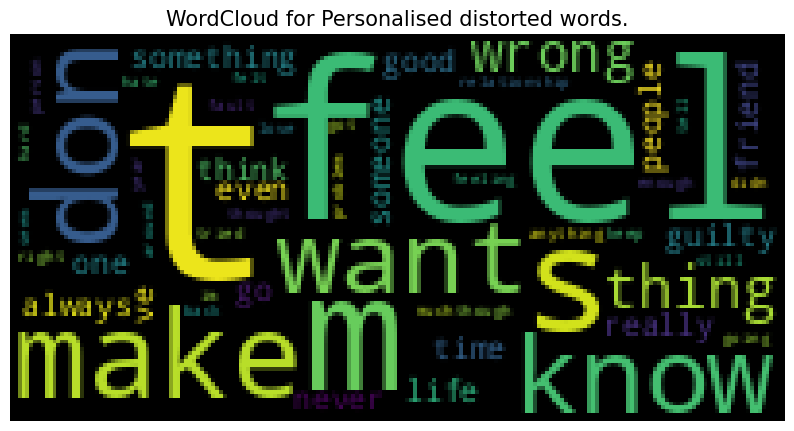

In [ ]:

def plot_word_cloud(data, typ):
  words_corpus = " ".join(data['Distorted part'])

  plt.figure(figsize = (10,10))

  wc = WordCloud(max_words = 100,
                width = 200,
                height = 100,
                collocations = False).generate(words_corpus)

  plt.title(f'WordCloud for {typ} distorted words.', fontsize = 15)
  plt.axis('off')
  plt.imshow(wc)
  plt.show()
  print()

plot_word_cloud(df[df['Dominant Distortion']==9], typ='Personalised')

In [ ]:
import spacy

In [ ]:
!python -m spacy download en_core_web_lg

2023-10-07 06:27:56.836080: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
nlp = spacy.load('en_core_web_lg')

In [ ]:
df['Patient Question'] = df['Patient Question'].apply(lambda x: nlp(x).vector)

In [ ]:
df.head()

,Id_Number,Patient Question,Distorted part,Dominant Distortion
0,4500,"[0.69155645, 1.5892829, -1.4467152, -1.69463, ...",voice always fimilar someone knows im concerne...,9
1,4501,"[0.9942769, 1.2272906, -2.403417, -2.3949904, ...",feel trapped inside disgusting self like i’m w...,3
2,4502,"[0.61592704, 1.8866438, -3.0695815, -1.7963152...",0,7
3,4503,"[-0.582181, 0.8943917, -2.340637, -0.9494876, ...",0,7
4,4504,"[0.7071242, 1.659521, -2.4519486, -0.96102786,...",refused go didn’t know going go record could p...,2


In [ ]:
df['Distorted part'] = df['Distorted part'].apply(lambda x: nlp(x).vector)


In [ ]:
df.head(4)

,Id_Number,Patient Question,Distorted part,Dominant Distortion
0,4500,"[0.69155645, 1.5892829, -1.4467152, -1.69463, ...","[1.0331569, 1.0382924, -1.9355139, -1.457604, ...",9
1,4501,"[0.9942769, 1.2272906, -2.403417, -2.3949904, ...","[0.697199, 0.7048954, -3.0286956, -2.9154978, ...",3
2,4502,"[0.61592704, 1.8866438, -3.0695815, -1.7963152...","[2.1675, -5.4416, 7.1424, 8.7928, 6.9778, 8.85...",7
3,4503,"[-0.582181, 0.8943917, -2.340637, -0.9494876, ...","[2.1675, -5.4416, 7.1424, 8.7928, 6.9778, 8.85...",7


In [ ]:
df.head()

,Id_Number,Patient Question,Distorted part,Dominant Distortion
0,4500,"[0.69155645, 1.5892829, -1.4467152, -1.69463, ...","[1.0331569, 1.0382924, -1.9355139, -1.457604, ...",9
1,4501,"[0.9942769, 1.2272906, -2.403417, -2.3949904, ...","[0.697199, 0.7048954, -3.0286956, -2.9154978, ...",3
2,4502,"[0.61592704, 1.8866438, -3.0695815, -1.7963152...","[2.1675, -5.4416, 7.1424, 8.7928, 6.9778, 8.85...",7
3,4503,"[-0.582181, 0.8943917, -2.340637, -0.9494876, ...","[2.1675, -5.4416, 7.1424, 8.7928, 6.9778, 8.85...",7
4,4504,"[0.7071242, 1.659521, -2.4519486, -0.96102786,...","[0.66406184, 2.498192, -2.3956437, -0.30248338...",2


In [ ]:
type(df['Patient Question'])

pandas.core.series.Series

In [ ]:
df['Distorted part'].values

array([array([ 1.03315687e+00,  1.03829241e+00, -1.93551385e+00, -1.45760405e+00,
              -7.04070628e-01, -3.69264662e-01,  1.53253424e+00,  3.46135330e+00,
              -3.26039076e+00,  8.89637992e-02,  3.32793832e+00,  5.65801620e-01,
              -3.56585360e+00,  2.21372056e+00,  2.69192219e-01, -2.24424660e-01,
               8.27991486e-01, -4.21419114e-01, -5.17834604e-01, -6.78042293e-01,
               7.03842402e-01,  1.70904517e+00, -2.46705627e+00, -1.71454871e+00,
              -8.57503057e-01, -2.28129768e+00, -1.74718082e+00, -3.60433459e-01,
              -6.42756224e-01,  4.78646159e-01,  6.56646132e-01, -6.90834939e-01,
              -1.65512633e+00,  5.40347755e-01,  8.11987996e-01, -6.12899244e-01,
              -1.03464913e+00,  7.41553724e-01,  2.74427819e+00,  2.57211471e+00,
              -1.81060672e+00,  7.66153485e-02,  1.40287066e+00,  2.61373878e-01,
              -1.52899730e+00,  8.04199874e-01,  7.02494562e-01, -2.26230526e+00,
              -7

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df['Distorted part'].values
y = df['Dominant Distortion']

In [ ]:
X

array([array([ 1.03315687e+00,  1.03829241e+00, -1.93551385e+00, -1.45760405e+00,
              -7.04070628e-01, -3.69264662e-01,  1.53253424e+00,  3.46135330e+00,
              -3.26039076e+00,  8.89637992e-02,  3.32793832e+00,  5.65801620e-01,
              -3.56585360e+00,  2.21372056e+00,  2.69192219e-01, -2.24424660e-01,
               8.27991486e-01, -4.21419114e-01, -5.17834604e-01, -6.78042293e-01,
               7.03842402e-01,  1.70904517e+00, -2.46705627e+00, -1.71454871e+00,
              -8.57503057e-01, -2.28129768e+00, -1.74718082e+00, -3.60433459e-01,
              -6.42756224e-01,  4.78646159e-01,  6.56646132e-01, -6.90834939e-01,
              -1.65512633e+00,  5.40347755e-01,  8.11987996e-01, -6.12899244e-01,
              -1.03464913e+00,  7.41553724e-01,  2.74427819e+00,  2.57211471e+00,
              -1.81060672e+00,  7.66153485e-02,  1.40287066e+00,  2.61373878e-01,
              -1.52899730e+00,  8.04199874e-01,  7.02494562e-01, -2.26230526e+00,
              -7

In [ ]:
X = np.stack(X)

In [ ]:
X

array([[ 1.0331569 ,  1.0382924 , -1.9355139 , ..., -0.47712305,
        -4.710346  ,  3.3555586 ],
       [ 0.697199  ,  0.7048954 , -3.0286956 , ...,  1.7481321 ,
        -4.4995866 ,  2.4953868 ],
       [ 2.1675    , -5.4416    ,  7.1424    , ..., -3.55      ,
         6.7516    ,  1.141     ],
       ...,
       [-0.03808767,  0.8454622 , -1.8724911 , ..., -0.60092795,
        -2.6536682 ,  1.1594158 ],
       [ 2.1675    , -5.4416    ,  7.1424    , ..., -3.55      ,
         6.7516    ,  1.141     ],
       [ 2.1675    , -5.4416    ,  7.1424    , ..., -3.55      ,
         6.7516    ,  1.141     ]], dtype=float32)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[0.5547297 , 0.4176635 , 0.35593516, ..., 0.49490103, 0.19878784,
        0.6165434 ],
       [0.50763327, 0.3961743 , 0.2783755 , ..., 0.6974885 , 0.21352035,
        0.50226647],
       [0.7137484 , 0.        , 1.        , ..., 0.215146  , 1.        ,
        0.32233125],
       ...,
       [0.40455657, 0.40523458, 0.36040652, ..., 0.48362982, 0.34255362,
        0.32477787],
       [0.7137484 , 0.        , 1.        , ..., 0.215146  , 1.        ,
        0.32233125],
       [0.7137484 , 0.        , 1.        , ..., 0.215146  , 1.        ,
        0.32233125]], dtype=float32)

In [ ]:
y.value_counts()

7     933
6     239
8     239
4     195
3     165
9     153
2     143
1     134
5     122
10    107
0     100
Name: Dominant Distortion, dtype: int64

In [ ]:
# from imblearn.combine import SMOTETomek
# from imblearn.under_sampling import TomekLinks
# resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
# X, y = resample.fit_resample(X, y)

In [ ]:
y.value_counts()

7     933
6     239
8     239
4     195
3     165
9     153
2     143
1     134
5     122
10    107
0     100
Name: Dominant Distortion, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2022)

In [ ]:
X_train

array([[0.5889144 , 0.49260837, 0.50590825, ..., 0.6548207 , 0.3954212 ,
        0.17692651],
       [0.7137484 , 0.        , 1.        , ..., 0.215146  , 1.        ,
        0.32233125],
       [0.41945142, 0.4044355 , 0.25865006, ..., 0.64932626, 0.41205093,
        0.24605143],
       ...,
       [0.5357762 , 0.49981016, 0.34993616, ..., 0.6408826 , 0.3754685 ,
        0.33234006],
       [0.56287533, 0.38803917, 0.3497857 , ..., 0.6343975 , 0.19184437,
        0.5120743 ],
       [0.548898  , 0.4115705 , 0.2892204 , ..., 0.6472836 , 0.16065678,
        0.44918722]], dtype=float32)

In [ ]:
len(X_train)

1771

In [ ]:
y_test

882     7
720     6
867     7
765     8
616     7
       ..
1794    7
1968    7
331     9
2453    1
2302    6
Name: Dominant Distortion, Length: 759, dtype: int64

In [ ]:
X_train

array([[0.5889144 , 0.49260837, 0.50590825, ..., 0.6548207 , 0.3954212 ,
        0.17692651],
       [0.7137484 , 0.        , 1.        , ..., 0.215146  , 1.        ,
        0.32233125],
       [0.41945142, 0.4044355 , 0.25865006, ..., 0.64932626, 0.41205093,
        0.24605143],
       ...,
       [0.5357762 , 0.49981016, 0.34993616, ..., 0.6408826 , 0.3754685 ,
        0.33234006],
       [0.56287533, 0.38803917, 0.3497857 , ..., 0.6343975 , 0.19184437,
        0.5120743 ],
       [0.548898  , 0.4115705 , 0.2892204 , ..., 0.6472836 , 0.16065678,
        0.44918722]], dtype=float32)

In [ ]:
#X_train_2d = np.stack(X_train)
#X_test_2d = np.stack(X_test)


In [ ]:
#X_train_2d

In [ ]:
#X_train_2d.shape

In [ ]:
X_train

array([[0.5889144 , 0.49260837, 0.50590825, ..., 0.6548207 , 0.3954212 ,
        0.17692651],
       [0.7137484 , 0.        , 1.        , ..., 0.215146  , 1.        ,
        0.32233125],
       [0.41945142, 0.4044355 , 0.25865006, ..., 0.64932626, 0.41205093,
        0.24605143],
       ...,
       [0.5357762 , 0.49981016, 0.34993616, ..., 0.6408826 , 0.3754685 ,
        0.33234006],
       [0.56287533, 0.38803917, 0.3497857 , ..., 0.6343975 , 0.19184437,
        0.5120743 ],
       [0.548898  , 0.4115705 , 0.2892204 , ..., 0.6472836 , 0.16065678,
        0.44918722]], dtype=float32)

In [ ]:
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_trained_scaled = scaler.fit_transform(X_train_2d)
X_test_scaled = scaler.fit_transform(X_test_2d)'''

'from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nX_trained_scaled = scaler.fit_transform(X_train_2d)\nX_test_scaled = scaler.fit_transform(X_test_2d)'

In [ ]:
#X_trained_scaled

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)

0.45454545454545453

In [ ]:
clf = MultinomialNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.48221343873517786

In [ ]:
svc =SVC()
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.5111989459815547

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.49407114624505927

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)

0.5164690382081687

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=150,metric = 'euclidean')
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.48089591567852435

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
y_rf_predicted = rf.predict(X_test)

<Axes: >

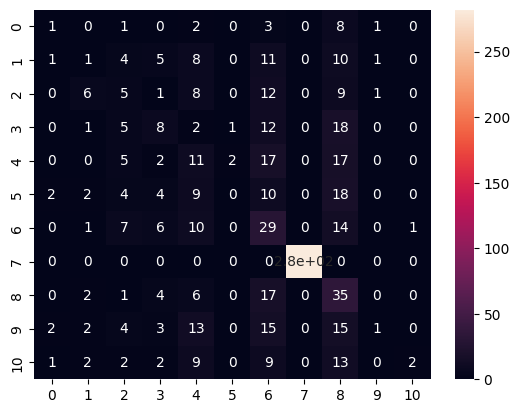

In [ ]:
cm = confusion_matrix(y_test,y_rf_predicted)
sns.heatmap(cm,annot = True)

In [ ]:

print("f1_score:",f1_score(y_test,y_rf_predicted,average = 'macro'))
print("precision_score:",precision_score(y_test,y_rf_predicted,average = 'macro'))
print("recall_score:",recall_score(y_test,y_rf_predicted,average = 'macro'))


f1_score: 0.21237991456129993
precision_score: 0.277933464274692
recall_score: 0.23754257068089626


In [ ]:
print("confusion_matrix:")
print(cm)

confusion_matrix:
[[  1   0   1   0   2   0   3   0   8   1   0]
 [  1   1   4   5   8   0  11   0  10   1   0]
 [  0   6   5   1   8   0  12   0   9   1   0]
 [  0   1   5   8   2   1  12   0  18   0   0]
 [  0   0   5   2  11   2  17   0  17   0   0]
 [  2   2   4   4   9   0  10   0  18   0   0]
 [  0   1   7   6  10   0  29   0  14   0   1]
 [  0   0   0   0   0   0   0 282   0   0   0]
 [  0   2   1   4   6   0  17   0  35   0   0]
 [  2   2   4   3  13   0  15   0  15   1   0]
 [  1   2   2   2   9   0   9   0  13   0   2]]


In [ ]:
y_xgb_predicted = xgb.predict(X_test)

In [ ]:
print("f1_score:",f1_score(y_test,y_xgb_predicted,average = 'macro'))
print("precision_score:",precision_score(y_test,y_xgb_predicted,average = 'macro'))
print("recall_score:",recall_score(y_test,y_xgb_predicted,average = 'macro'))


f1_score: 0.2710412193991989
precision_score: 0.2932869652052212
recall_score: 0.2831239478866551


<Axes: >

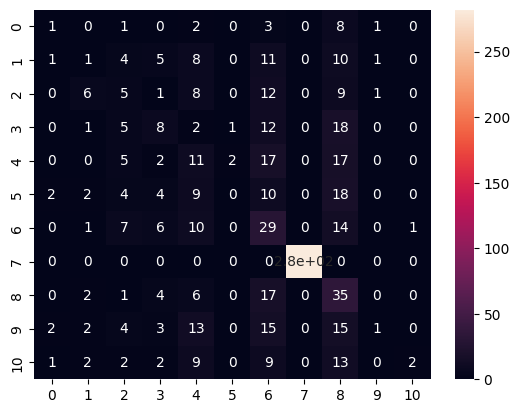

In [ ]:
cm_xgb = confusion_matrix(y_test,y_xgb_predicted)
sns.heatmap(cm,annot = True)

In [ ]:
print("confusion_matrix:")
print(cm_xgb)

confusion_matrix:
[[  3   0   0   1   2   1   2   0   6   1   0]
 [  3   5   5   5   7   0   5   0   7   4   0]
 [  2   4   9   2   8   1   9   0   3   4   0]
 [  7   2   0  13   4   2   6   0  10   1   2]
 [  4   2   3   1  14   1  10   0  14   3   2]
 [  3   4   7   7   3   2   6   0  13   4   0]
 [  3   6   4   9   5   0  24   0  10   6   1]
 [  0   0   0   0   0   0   0 282   0   0   0]
 [  2   6   0   2   8   3  11   0  31   2   0]
 [  0   9   1   3  11   2  15   0   7   6   1]
 [  1   5   1   3   3   0   8   0  15   1   3]]


In [ ]:

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf_g = GaussianNB()
clf_g.fit(X_train,y_train)
clf_g.score(X_test,y_test)

0.47035573122529645

In [ ]:
y_clf_g_predicted = clf_g.predict(X_test)
print("f1_score:",f1_score(y_test,y_clf_g_predicted,average = 'macro'))
print("precision_score:",precision_score(y_test,y_clf_g_predicted,average = 'macro'))
print("recall_score:",recall_score(y_test,y_clf_g_predicted,average = 'macro'))

f1_score: 0.21402975028012475
precision_score: 0.22416928897790142
recall_score: 0.22606454881559312


In [ ]:
clf_ada = AdaBoostClassifier()
clf_ada.fit(X_train,y_train)
clf_ada.score(X_test,y_test)

0.4400527009222661

In [ ]:
y_clf_ada_predicted = clf_ada.predict(X_test)
print("f1_score:",f1_score(y_test,y_clf_ada_predicted,average = 'macro'))
print("precision_score:",precision_score(y_test,y_clf_ada_predicted,average = 'macro'))
print("recall_score:",recall_score(y_test,y_clf_ada_predicted,average = 'macro'))

f1_score: 0.16483837181459793
precision_score: 0.16242497653760019
recall_score: 0.1735684295044209


In [ ]:
y_dtc_predicted = dtc.predict(X_test)
print("f1_score:",f1_score(y_test,y_dtc_predicted ,average = 'macro'))
print("precision_score:",precision_score(y_test,y_dtc_predicted ,average = 'macro'))
print("recall_score:",recall_score(y_test,y_dtc_predicted ,average = 'macro'))

f1_score: 0.20189032318419944
precision_score: 0.20376091799950388
recall_score: 0.2033018080682538


In [ ]:
y_svc_predicted = svc.predict(X_test)
print("f1_score:",f1_score(y_test,y_svc_predicted ,average = 'macro'))
print("precision_score:",precision_score(y_test,y_svc_predicted ,average = 'macro'))
print("recall_score:",recall_score(y_test,y_svc_predicted ,average = 'macro'))

f1_score: 0.20110770659968386
precision_score: 0.20635636179709135
recall_score: 0.24675992667231716


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_clf_predicted = clf.predict(X_test)
print("f1_score:",f1_score(y_test,y_clf_predicted ,average = 'macro'))
print("precision_score:",precision_score(y_test,y_clf_predicted ,average = 'macro'))
print("recall_score:",recall_score(y_test,y_clf_predicted ,average = 'macro'))

f1_score: 0.16692946261830327
precision_score: 0.16376824942967405
recall_score: 0.21308628329904925


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
def report(model):
  pred = model.predict(X_test)
  print(classification_report(y_test,pred))

In [ ]:
report(rf)

              precision    recall  f1-score   support

           0       0.14      0.06      0.09        16
           1       0.06      0.02      0.03        41
           2       0.13      0.12      0.12        42
           3       0.23      0.17      0.20        47
           4       0.14      0.20      0.17        54
           5       0.00      0.00      0.00        49
           6       0.21      0.43      0.29        68
           7       1.00      1.00      1.00       282
           8       0.22      0.54      0.32        65
           9       0.25      0.02      0.03        55
          10       0.67      0.05      0.09        40

    accuracy                           0.49       759
   macro avg       0.28      0.24      0.21       759
weighted avg       0.50      0.49      0.47       759



In [ ]:
report(svc)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        41
           2       0.19      0.07      0.10        42
           3       0.47      0.19      0.27        47
           4       0.17      0.20      0.18        54
           5       0.00      0.00      0.00        49
           6       0.22      0.63      0.32        68
           7       1.00      1.00      1.00       282
           8       0.23      0.62      0.33        65
           9       0.00      0.00      0.00        55
          10       0.00      0.00      0.00        40

    accuracy                           0.51       759
   macro avg       0.21      0.25      0.20       759
weighted avg       0.46      0.51      0.46       759



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
report(dtc)

              precision    recall  f1-score   support

           0       0.03      0.06      0.04        16
           1       0.12      0.12      0.12        41
           2       0.10      0.10      0.10        42
           3       0.22      0.21      0.22        47
           4       0.12      0.15      0.13        54
           5       0.10      0.06      0.07        49
           6       0.17      0.16      0.17        68
           7       1.00      1.00      1.00       282
           8       0.16      0.20      0.18        65
           9       0.11      0.07      0.09        55
          10       0.11      0.10      0.11        40

    accuracy                           0.45       759
   macro avg       0.20      0.20      0.20       759
weighted avg       0.46      0.45      0.45       759



In [ ]:
report(xgb)

              precision    recall  f1-score   support

           0       0.11      0.19      0.14        16
           1       0.12      0.12      0.12        41
           2       0.30      0.21      0.25        42
           3       0.28      0.28      0.28        47
           4       0.22      0.26      0.24        54
           5       0.17      0.04      0.07        49
           6       0.25      0.35      0.29        68
           7       1.00      1.00      1.00       282
           8       0.27      0.48      0.34        65
           9       0.19      0.11      0.14        55
          10       0.33      0.07      0.12        40

    accuracy                           0.52       759
   macro avg       0.29      0.28      0.27       759
weighted avg       0.52      0.52      0.50       759



In [ ]:
report(clf_ada)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        41
           2       0.11      0.07      0.09        42
           3       0.07      0.13      0.09        47
           4       0.11      0.11      0.11        54
           5       0.10      0.08      0.09        49
           6       0.15      0.21      0.17        68
           7       1.00      1.00      1.00       282
           8       0.16      0.26      0.20        65
           9       0.00      0.00      0.00        55
          10       0.08      0.05      0.06        40

    accuracy                           0.44       759
   macro avg       0.16      0.17      0.16       759
weighted avg       0.43      0.44      0.43       759



In [ ]:
report(clf)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        41
           2       0.11      0.12      0.11        42
           3       0.22      0.11      0.14        47
           4       0.11      0.02      0.03        54
           5       0.00      0.00      0.00        49
           6       0.18      0.50      0.27        68
           7       1.00      1.00      1.00       282
           8       0.19      0.60      0.28        65
           9       0.00      0.00      0.00        55
          10       0.00      0.00      0.00        40

    accuracy                           0.48       759
   macro avg       0.16      0.21      0.17       759
weighted avg       0.43      0.48      0.44       759



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
report(clf_g)

              precision    recall  f1-score   support

           0       0.05      0.06      0.05        16
           1       0.00      0.00      0.00        41
           2       0.12      0.21      0.15        42
           3       0.32      0.17      0.22        47
           4       0.15      0.31      0.20        54
           5       0.11      0.08      0.09        49
           6       0.11      0.06      0.08        68
           7       1.00      1.00      1.00       282
           8       0.23      0.32      0.27        65
           9       0.15      0.04      0.06        55
          10       0.23      0.23      0.23        40

    accuracy                           0.47       759
   macro avg       0.22      0.23      0.21       759
weighted avg       0.47      0.47      0.46       759

